**Brian Blaylock**  
*April 7, 2021*

# Rapid Refrsh (RAP) Model: Download and plot
I recently added the ability to download and plot the RAP model. Just set `model='rap'` in the function arguments. The RAP model is available from NOMADS, AWS, and GCP. There are differences in the file output between the HRRR and RAP, so this may not generate expected results. It would be a good thing to double check your work.

In [1]:
from hrrrb.archive import download_hrrr, xhrrr

In [2]:
a = download_hrrr('2021-04-01', 'TMP:2 m', model='rap')
b = download_hrrr('2021-04-06', '(U|V)GRD:10 m', model='rap')

💡 Info: Downloading [1] GRIB2 files

Download subset from [google]:
✅ Success! Searched for [TMP:2 m] and got [1] GRIB fields and saved as /p/cwfs/blaylock/data/rap/20210401/subset_20210401_rap.t00z.awip32f00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:01.293862
💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [(U|V)GRD:10 m] and got [2] GRIB fields and saved as /p/cwfs/blaylock/data/rap/20210406/subset_20210406_rap.t00z.awip32f00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:02.209169


In [3]:
a, b

((PosixPath('/p/cwfs/blaylock/data/rap/20210401/subset_20210401_rap.t00z.awip32f00.grib2'),
  'https://storage.googleapis.com/rapid-refresh/rap.20210401/rap.t00z.awip32f00.grib2'),
 (PosixPath('/p/cwfs/blaylock/data/rap/20210406/subset_20210406_rap.t00z.awip32f00.grib2'),
  'https://nomads.ncep.noaa.gov/pub/data/nccf/com/rap/prod/rap.20210406/rap.t00z.awip32f00.grib2'))

In [4]:
%%bash
wgrib2 /p/cwfs/blaylock/data/rap/20210401/subset_20210401_rap.t00z.awip32f00.grib2

wgrib2 /p/cwfs/blaylock/data/rap/20210406/subset_20210406_rap.t00z.awip32f00.grib2

1:0:d=2021040100:TMP:2 m above ground:anl:
1.1:1:d=2021040600:UGRD:10 m above ground:anl:
1.2:1:d=2021040600:VGRD:10 m above ground:anl:


In [5]:
x = xhrrr('2021-04-06', 'TMP:2 m', model='rap')
x

💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [TMP:2 m] and got [1] GRIB fields and saved as /p/cwfs/blaylock/data/rap/20210406/subset_20210406_rap.t00z.awip32f00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:01.600314


<xarray.Dataset>
Dimensions:            (x: 349, y: 277)
Coordinates:
    time               datetime64[ns] 2021-04-06
    step               timedelta64[ns] 00:00:00
    heightAboveGround  int64 2
    latitude           (y, x) float64 1.0 1.104 1.208 ... 46.93 46.64 46.35
    longitude          (y, x) float64 214.5 214.7 214.9 ... 357.3 357.4 357.4
    valid_time         datetime64[ns] 2021-04-06
Dimensions without coordinates: x, y
Data variables:
    t2m                (y, x) float32 299.4 299.4 299.4 ... 281.1 281.8 282.1
Attributes: (12/13)
    GRIB_edition:                   2
    GRIB_centre:                    kwbc
    GRIB_centreDescription:         US National Weather Service - NCEP 
    GRIB_subCentre:                 0
    Conventions:                    CF-1.7
    institution:                    US National Weather Service - NCEP 
    ...                             ...
    url:                            https://nomads.ncep.noaa.gov/pub/data/ncc...
    grid_mapping_name:              lambert_conformal_conic
    standard_parallel:              (38.5, 38.5)
    longitude_of_central_meridian:  262.5
    latitude_of_projection_origin:  38.5
    crs:                            <cartopy.crs.LambertConformal object at 0...

In [6]:
import matplotlib.pyplot as plt

from toolbox.cartopy_tools import common_features, pc
from toolbox.wind import uv_to_spddir
from paint.standard2 import cm_tmp, cm_wind

/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


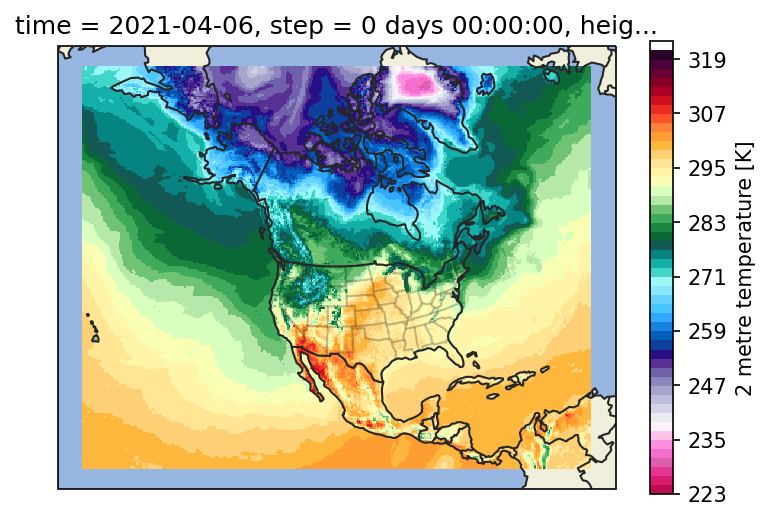

In [7]:
ax = common_features(crs=x.crs, OCEAN=True, LAND=True, linewidth=1, BORDERS=True, STATES=True, dpi=150)
x.t2m.plot(x='longitude', y='latitude', ax=ax, transform=pc, **cm_tmp(units='k').cmap_kwargs)

In [8]:
x = xhrrr('2021-04-06', '(U|V)GRD:500 mb', model='rap')
x

💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [(U|V)GRD:500 mb] and got [2] GRIB fields and saved as /p/cwfs/blaylock/data/rap/20210406/subset_20210406_rap.t00z.awip32f00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:02.228224


<xarray.Dataset>
Dimensions:        (x: 349, y: 277)
Coordinates:
    time           datetime64[ns] 2021-04-06
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  int64 500
    latitude       (y, x) float64 1.0 1.104 1.208 1.312 ... 46.93 46.64 46.35
    longitude      (y, x) float64 214.5 214.7 214.9 215.1 ... 357.3 357.4 357.4
    valid_time     datetime64[ns] 2021-04-06
Dimensions without coordinates: x, y
Data variables:
    u              (y, x) float32 -2.21 -2.022 -1.835 ... 19.04 17.85 16.92
    v              (y, x) float32 -6.738 -7.051 -7.363 ... 16.2 15.64 15.2
Attributes: (12/13)
    GRIB_edition:                   2
    GRIB_centre:                    kwbc
    GRIB_centreDescription:         US National Weather Service - NCEP 
    GRIB_subCentre:                 0
    Conventions:                    CF-1.7
    institution:                    US National Weather Service - NCEP 
    ...                             ...
    url:                            https://nomads.ncep.noaa.gov/pub/data/ncc...
    grid_mapping_name:              lambert_conformal_conic
    standard_parallel:              (38.5, 38.5)
    longitude_of_central_meridian:  262.5
    latitude_of_projection_origin:  38.5
    crs:                            <cartopy.crs.LambertConformal object at 0...

/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


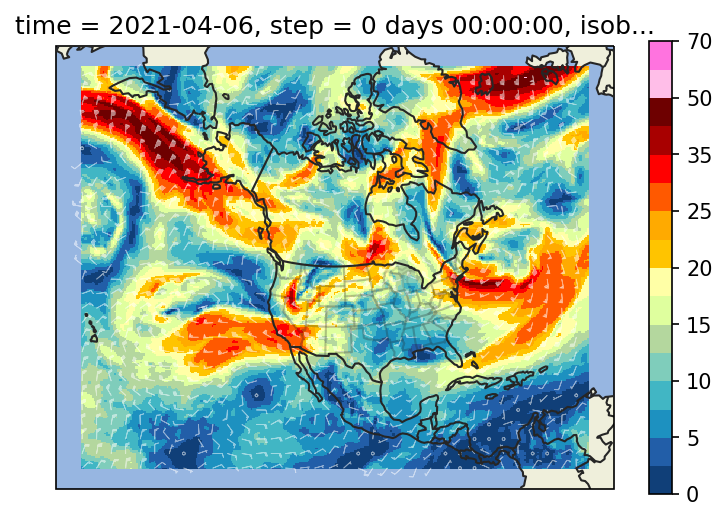

In [9]:
ax = common_features(crs=x.crs, OCEAN=True, LAND=True, linewidth=1, BORDERS=True, STATES=True, dpi=150)
wspd, wdir = uv_to_spddir(x.u, x.v)
wspd.plot(x='longitude', y='latitude', ax=ax, transform=pc, **cm_wind().cmap_kwargs)

xthin = x.thin(10)
plt.barbs(xthin.longitude.data, xthin.latitude.data, xthin.u.data, xthin.v.data,
          transform=pc, barb_increments=dict(half=2.5, full=5, flag=25),
          length=3, color='w', alpha=.5, linewidth=.4)